# SOLAR ENERGY PRODUCTION

## OBJECTIVE

Develop a machine learning model to accurately predict the annual solar energy production for future installations, considering variables such as developer, region, and equipment. By leveraging this model, We aims to provide customers with informed choices regarding developers, equipment, and locations, there by optimizing project planning and maximizing returns on investment.

## DATA DICTIONARY

dataset used for model building contained 218115 rows of 17 columns. The data contains the following information:

| Variable| Description|
| ---|----|
|Data Through Date| The date up to which the data in the dataset is valid or relevant|
|Project ID| A unique identifier for each solar power project in the dataset|
|Interconnection Date| The date when the solar power project was connected to the grid or power distribution system|
|Utility| The utility company or organization responsible for managing the power grid and distributing electricity|
|City/Town| The location of the solar power project (city or town)|
|County| The administrative division within the state where the solar project is situated|
|Zip| The postal code or ZIP code corresponding to the project’s location|
|Division| A further geographical subdivision within the state (if applicable)|
|Substation| The electrical substation where the solar power project is connected to the grid|
|Circuit ID| The unique identifier for the circuit within the substation that the solar project is connected to|
|Developer| The entity or organization responsible for developing and implementing the solar power project|
|Metering Method| The method used to measure and record the solar energy production (e.g., net metering, gross metering)|
|Estimated PV System Size (kWdc)| The estimated size of the photovoltaic (PV) system in kilowatts direct current (kWdc). This represents the total capacity of the solar panels|
|PV System Size (kWac)| The actual size of the PV system in kilowatts alternating current (kWac). This accounts for system losses and efficiency|
|Estimated Annual PV Energy Production (kWh)| The projected annual energy production from the PV system in kilowatt-hours (kWh). This estimate considers factors like solar irradiance, panel orientation, and efficiency|
|Energy Storage System Size (kWac)| If applicable, the size of any energy storage system (such as batteries) connected to the solar project, measured in kilowatts alternating current (kWac)|
|Number of Projects| The total count of solar power projects represented in the dataset|

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Step 2: Load Dataset

In [2]:
# load dataset
df=pd.read_csv('C:/Users/LENOVO/project 22/Solar Energy.csv')

## Step 3: Data Preprocessing

In [3]:
# Display the first five rows of a DataFrame
df.head()

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
0,12/31/2023,SDG-66301,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,9B05,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1
1,12/31/2023,SDG-66299,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,5X67,Kamtech Solar Solutions,NM,6.74,5.76,7911,NaN,1
2,12/31/2023,SDG-66288,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,4B08,SUNCO,NM,3.05,2.61,3585,NaN,1
3,12/31/2023,SDG-66284,12/29/2023,Con Ed,Brooklyn,Kings,11236.0,CENY-BK,Bensonhurst_2,3037,Kamtech Solar Solutions,NM,5.62,4.80,6592,NaN,1
4,12/31/2023,SDG-66277,12/28/2023,Con Ed,Springfield Gardens,Queens,11413.0,CENY-Q,Jamaica,9112,Kamtech Solar Solutions,NM,6.05,5.17,7100,NaN,1


In [4]:
# checking the details of Dataframe Columns and Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [5]:
# checking the shape of the Data
df.shape

(218115, 17)

In [6]:
# The number of unique values in specification
df.nunique()

Data Through Date                                   1
Project ID                                     218077
Interconnection Date                             5411
Utility                                             7
City/Town                                        3009
County                                             62
Zip                                              1729
Division                                          109
Substation                                       2255
Circuit ID                                       6429
Developer                                        2567
Metering Method                                     6
Estimated PV System Size (kWdc)                  3191
PV System Size (kWac)                            3095
Estimated Annual PV Energy Production (kWh)      3769
Energy Storage System Size (kWac)                 210
Number of Projects                                  1
dtype: int64

In [7]:
# Checking the decriptive statistics of Dataset
df.describe()

,Zip,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
count,218019.000000,218115.000000,218115.000000,2.181150e+05,4091.000000,218115.0
mean,11751.734473,24.507977,19.065451,2.876828e+04,32.174727,1.0
std,962.129108,291.525394,211.419642,3.422042e+05,296.161116,0.0
min,10001.000000,0.010000,0.010000,1.400000e+01,0.350000,1.0
25%,11220.000000,5.270000,4.500000,6.180000e+03,5.000000,1.0
50%,11717.000000,7.130000,6.090000,8.364000e+03,7.600000,1.0
75%,12018.000000,10.240000,8.750000,1.201700e+04,10.000000,1.0
max,14905.000000,43470.000000,31500.000000,5.102682e+07,5000.000000,1.0


In [8]:
# Checking the Missing values in the dataset
df.isnull().sum()

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64

From this we can see that there are some missing values in Project ID,City/Town,Zip,Division,substation,circuit ID,Developer,Metering Method,Energy Storage System Size.

In [9]:
# DataFrame Null Values as Percentages
null_percentage = df.isnull().mean() * 100
print(null_percentage)

Data Through Date                               0.000000
Project ID                                      0.001375
Interconnection Date                            0.000000
Utility                                         0.000000
City/Town                                       0.026591
County                                          0.000000
Zip                                             0.044013
Division                                       39.077551
Substation                                     36.652225
Circuit ID                                      0.013754
Developer                                       4.836898
Metering Method                                 0.212273
Estimated PV System Size (kWdc)                 0.000000
PV System Size (kWac)                           0.000000
Estimated Annual PV Energy Production (kWh)     0.000000
Energy Storage System Size (kWac)              98.124384
Number of Projects                              0.000000
dtype: float64


From this we can see that  the column Energy Storage System Size has 98% missing values so we can drop this column.Project ID and Circuit ID has very small quantity of missing values so we can drop the missing rows. All the other columns with missing values we can replce the missing values with appropriate values.

### Data cleaning and Handling Missing values

In [10]:
# drop the column Energy Storage System Size (KWac)

df = df.drop(columns=['Energy Storage System Size (kWac)'])


In [11]:
# we can drop the column Project ID and Circuit ID since they are not importat for prediction
df.drop(columns=["Project ID", "Circuit ID"], inplace=True)

In [12]:
# since zip is a catogorical column convert it into string
df["Zip"] = df["Zip"].astype(str)

In [13]:
# fill the missing values
df.fillna("unknown", inplace=True)


In [14]:
# Number of Duplicated Rows in the Datase
num_duplicated = df.duplicated().sum()
print(f"Number of Duplicated Rows: {num_duplicated}")
df = df.drop_duplicates()

Number of Duplicated Rows: 2385


In [15]:
df.duplicated().sum()

0

In [16]:
num_rows, num_columns = df.shape
print(f"Shape of Cleaned DataFrame: {num_rows} rows and {num_columns} columns")

Shape of Cleaned DataFrame: 215730 rows and 14 columns


In [17]:
df.head(3)

,Data Through Date,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,12/31/2023,12/29/2023,Con Ed,Richmond Hill,Queens,11418.0,CENY-BK,Brownsville_2,Kamtech Solar Solutions,NM,6.05,5.17,7100,1
1,12/31/2023,12/29/2023,Con Ed,Bronx,Bronx,10473.0,CENY-BX,Parkchester_2,Kamtech Solar Solutions,NM,6.74,5.76,7911,1
2,12/31/2023,12/29/2023,Con Ed,Brooklyn,Kings,11225.0,CENY-BK,Bensonhurst_2,SUNCO,NM,3.05,2.61,3585,1


In [18]:
# Checking the Missing values in the dataset
df.isnull().sum()

Data Through Date                              0
Interconnection Date                           0
Utility                                        0
City/Town                                      0
County                                         0
Zip                                            0
Division                                       0
Substation                                     0
Developer                                      0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Number of Projects                             0
dtype: int64

In [19]:
# Count of Each Unique Value in index column
df["City/Town"].nunique()

3010

In [20]:
# Count of Each Unique Value in Division column
df["Division"].nunique()

110

In [21]:
# Count of Each Unique Value in Substation column
df["Substation"].nunique()

2256

In [22]:
# Count of Each Unique Value in Developer column
df["Developer"].nunique()

2568

In [23]:
# Count of Each Unique Value in County column
df["County"].nunique()

62

From the above results we get the unique values we are analysing the projects of 3009 City/Town and there 110 divisions and has 2255 Substations. There are 2567 developers and 62 countys

In [24]:
df['Metering Method'].nunique()

7

In [25]:
# Check the data types after conversion
print(df.dtypes)

Data Through Date                               object
Interconnection Date                            object
Utility                                         object
City/Town                                       object
County                                          object
Zip                                             object
Division                                        object
Substation                                      object
Developer                                       object
Metering Method                                 object
Estimated PV System Size (kWdc)                float64
PV System Size (kWac)                          float64
Estimated Annual PV Energy Production (kWh)      int64
Number of Projects                               int64
dtype: object


### Feature Engineering

In [26]:
# Convert columns to datetime format
df['Data Through Date'] = pd.to_datetime(df['Data Through Date'], errors='coerce')
df['Interconnection Date'] = pd.to_datetime(df['Interconnection Date'], errors='coerce')

In [27]:
# Extract Year,Month,Day from Date
df['Year'] = df['Interconnection Date'].dt.year
df['Month'] = df['Interconnection Date'].dt.month
df['Day'] = df['Interconnection Date'].dt.day

# Calculate days since interconnection (assuming today as reference)
df['Days Since Interconnection'] = (pd.to_datetime("today") - df['Interconnection Date']).dt.days

# Drop original date columns
df= df.drop(columns=["Data Through Date", "Interconnection Date"])



In [28]:
from sklearn.preprocessing import LabelEncoder
# Encode categorical variables using label encoding
label_encoders = {}
categorical_cols = ['Utility', 'City/Town', 'County','Zip', 'Division', 'Substation', 'Developer', 'Metering Method']
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # Store encoders for future use


In [29]:
from sklearn.preprocessing import MinMaxScaler

# List of numerical columns to scale
num_columns = ['Estimated PV System Size (kWdc)', 'PV System Size (kWac)', 
               'Estimated Annual PV Energy Production (kWh)']

# Apply MinMaxScaler
scaler = MinMaxScaler()
df[num_columns] = scaler.fit_transform(df[num_columns])


## Exploratory Data Analysis (EDA)

In [30]:
df[num_columns]

,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh)
0,0.000139,0.000164,0.000139
1,0.000155,0.000183,0.000155
2,0.000070,0.000083,0.000070
3,0.000129,0.000152,0.000129
4,0.000139,0.000164,0.000139
...,...,...,...
218110,0.000064,0.000076,0.000064
218111,0.000067,0.000079,0.000067
218112,0.790476,0.790476,0.790476
218113,0.634921,0.634921,0.634921


In [31]:
# Summary statistics for numerical columns
df.describe()


,Utility,City/Town,County,Zip,Division,Substation,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects,Year,Month,Day,Days Since Interconnection
count,215730.000000,215730.000000,215730.000000,215730.000000,215730.000000,215730.000000,215730.000000,215730.000000,215730.000000,215730.000000,215730.000000,215730.0,215730.000000,215730.000000,215730.000000,215730.000000
mean,3.026236,1479.392532,37.591360,464.001168,90.856010,1620.346920,1618.727224,2.013725,0.000543,0.000585,0.000543,1.0,2018.088435,6.797603,15.821800,2378.288458
std,1.898164,891.799068,15.105746,358.412056,22.500653,690.599583,669.081403,0.311215,0.006570,0.006575,0.006570,0.0,3.680707,3.494805,8.726779,1343.799613
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,2000.000000,1.000000,1.000000,413.000000
25%,1.000000,646.000000,29.000000,256.000000,83.000000,897.000000,1232.000000,2.000000,0.000121,0.000143,0.000121,1.0,2015.000000,4.000000,8.000000,1163.000000
50%,3.000000,1493.000000,40.000000,385.000000,96.000000,2038.000000,1827.000000,2.000000,0.000164,0.000193,0.000164,1.0,2018.000000,7.000000,16.000000,2368.000000
75%,5.000000,2302.000000,51.000000,504.000000,109.000000,2254.000000,2138.000000,2.000000,0.000235,0.000277,0.000235,1.0,2021.000000,10.000000,23.000000,3334.000000
max,6.000000,3009.000000,61.000000,1729.000000,109.000000,2255.000000,2567.000000,6.000000,1.000000,1.000000,1.000000,1.0,2023.000000,12.000000,31.000000,8821.000000


#### Histogram of Estimated Annual PV Energy Production (kWh)

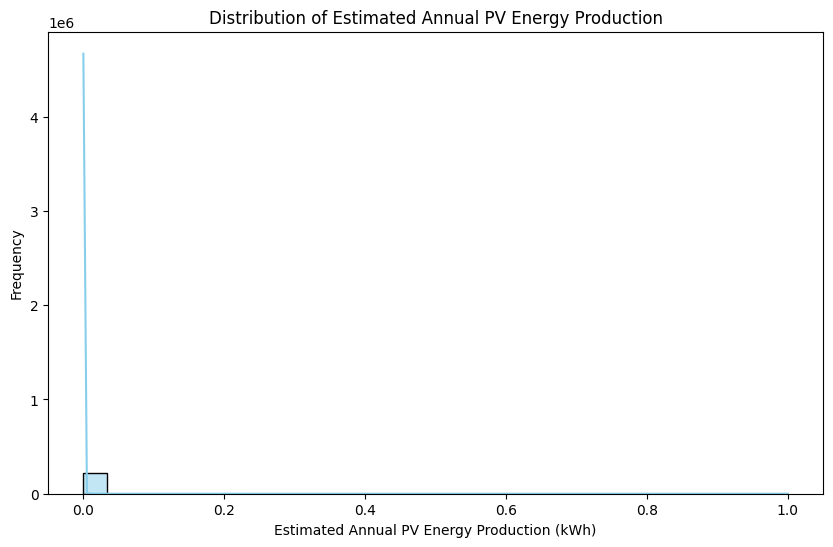

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimated Annual PV Energy Production (kWh)'], bins=30, kde=True, color='skyblue')

# Labels and title
plt.xlabel("Estimated Annual PV Energy Production (kWh)")
plt.ylabel("Frequency")
plt.title("Distribution of Estimated Annual PV Energy Production")

# Show the plot
plt.show()


Shape of Distribution:

The distribution appears to be right-skewed, meaning most solar installations generate lower annual energy, with fewer installations producing significantly higher energy outputs.

Spread & Range:

The majority of values are concentrated in the lower and mid-range, suggesting that most solar installations have a moderate energy production capacity.
There are a few high-production outliers, possibly indicating larger-scale installations.

Peak (Mode):

The highest frequency occurs at a lower kWh range, which likely represents the most common size of residential or small commercial PV systems.
Potential Outliers:

The presence of a long right tail suggests that a small number of systems generate significantly higher energy compared to the majority.

#### Count plot for Metering Method

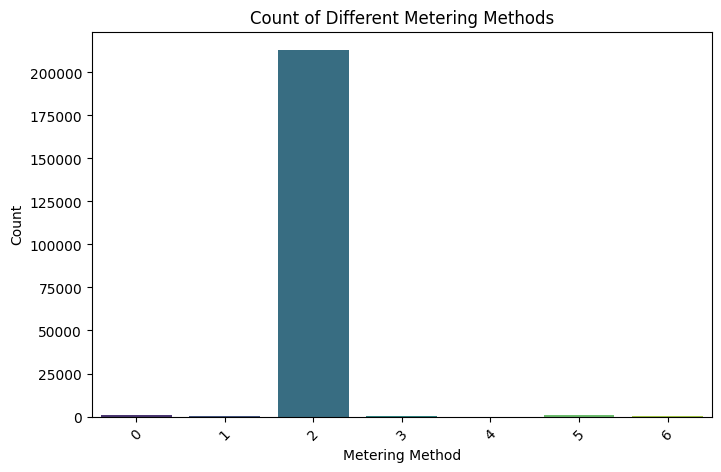

In [33]:
# Plot a count plot for Metering Method
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Metering Method', palette='viridis')

# Labels and title
plt.xlabel("Metering Method")
plt.ylabel("Count")
plt.title("Count of Different Metering Methods")

# Rotate x labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


Dominant Metering Method:

One metering method is significantly more common than others, indicating it is the preferred or standard method in most installations.

Lack of Diversity:

If one method overwhelmingly dominates, it could suggest regulatory requirements, economic benefits, or industry standardization.

Potential Insights:

If different metering methods correspond to different system sizes or project types, further analysis could reveal trends in energy production efficiency.

#### Correlation Between Numerical Features

In [34]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Extract top correlated features with target variable
target_corr = correlation_matrix["Estimated Annual PV Energy Production (kWh)"].sort_values(ascending=False)
target_corr

Estimated Annual PV Energy Production (kWh)    1.000000
Estimated PV System Size (kWdc)                1.000000
PV System Size (kWac)                          0.999917
Zip                                            0.076754
Year                                           0.028713
Day                                            0.012045
Month                                          0.011271
City/Town                                      0.001525
Utility                                       -0.001977
Substation                                    -0.017688
County                                        -0.018285
Days Since Interconnection                    -0.029695
Developer                                     -0.034358
Division                                      -0.037971
Metering Method                               -0.155659
Number of Projects                                  NaN
Name: Estimated Annual PV Energy Production (kWh), dtype: float64

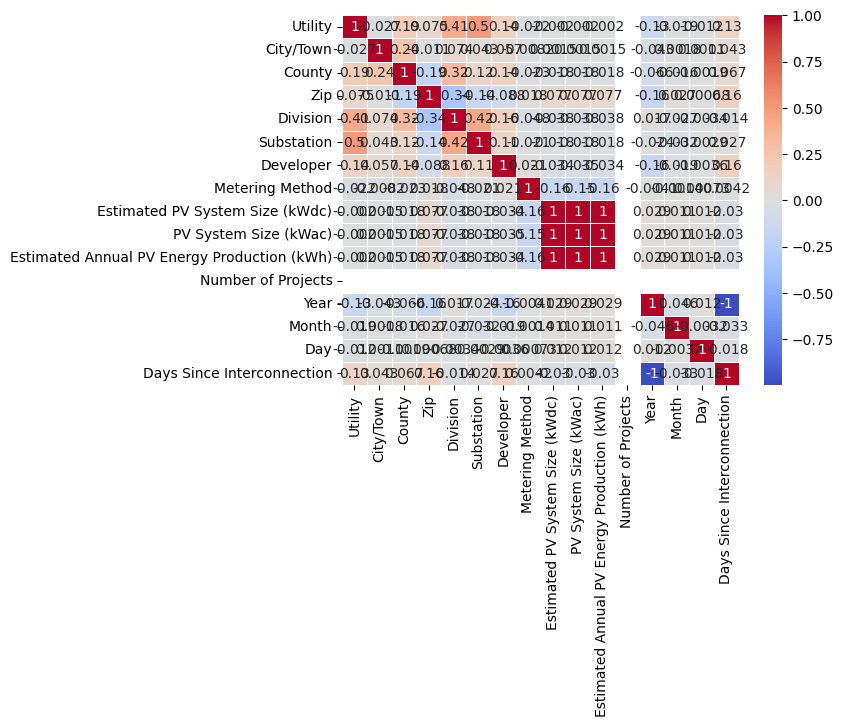

In [35]:

# Heatmap of correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',linewidths=0.5)
plt.show()



PV System Size (kWdc) and (kWac) are highly correlated with annual energy production  (~1.0 correlation), as expected.

Zip code shows a weak positive correlation (~0.09), suggesting regional differences in solar potential.

Division (-0.045) and substation(-0.021) have have some influence on production but are not strong predictors.

Metering Method (-0.16) and Developer (-0.04) have some influence on production but are not strong predictors.

Days Since Interconnection (-0.03) has a minor negative correlation.

County and City/Town have negligible correlations with energy production.

Number of Projects has NaN correlation, possibly due to constant values.

#### Box Plot for Metering Method vs Estimated PV System Size (kWdc)

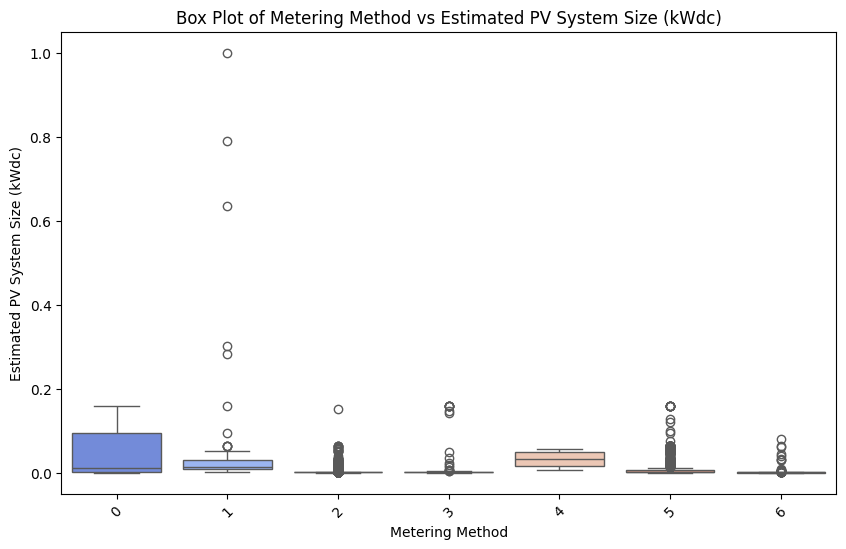

In [36]:
# Plot a box plot for Metering Method vs Estimated PV System Size (kWdc)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Metering Method', y='Estimated PV System Size (kWdc)', palette='coolwarm')

# Labels and title
plt.xlabel("Metering Method")
plt.ylabel("Estimated PV System Size (kWdc)")
plt.title("Box Plot of Metering Method vs Estimated PV System Size (kWdc)")

# Rotate x labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()

Variation in PV System Size:

Different metering methods show different distributions of Estimated PV System Size (kWdc).
Some methods have a higher median PV system size, while others are mostly used for smaller installations.

Presence of Outliers:

The plot shows several outliers above the upper whisker, indicating a few installations with significantly larger PV systems compared to the majority.

Interquartile Range (IQR):

The IQR (box size) varies across metering methods, suggesting that some methods are used in more diverse system sizes, while others are more standardized.

Central Tendency:

The median line inside each box represents the typical PV system size for each metering method.
If one method has a higher median than others, it may be used for larger installations.

### Outlier Detection

In [37]:
# Selecting numerical columns for outlier detection
numerical_cols = ["Estimated PV System Size (kWdc)", "PV System Size (kWac)", 
                  "Estimated Annual PV Energy Production (kWh)"]

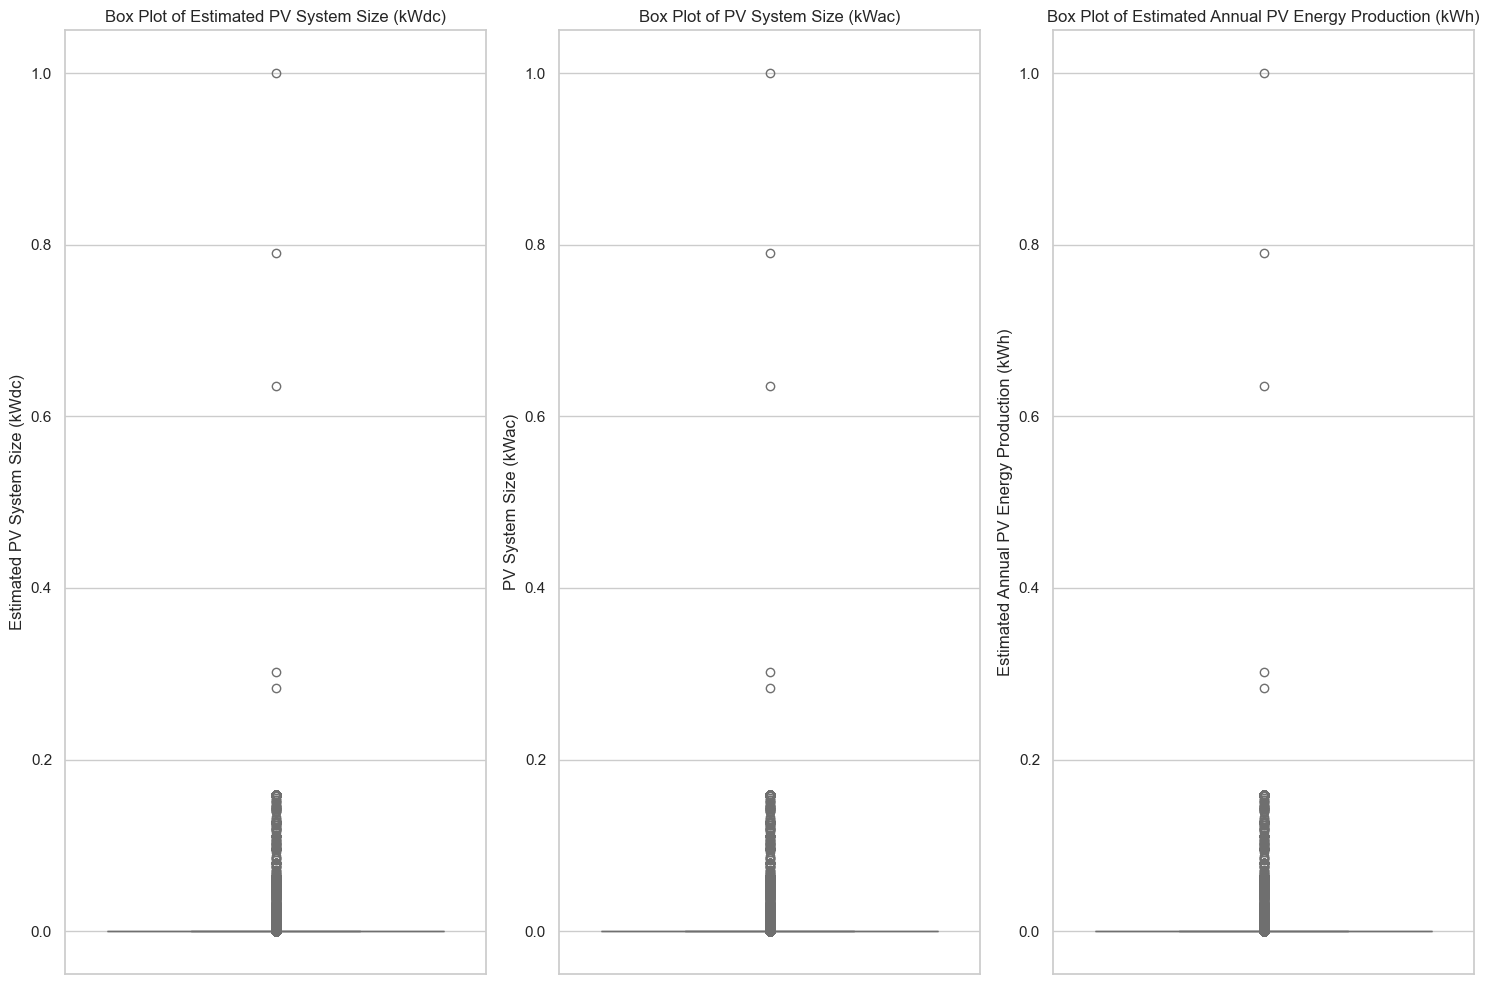

In [38]:
# Set plot style
sns.set(style="whitegrid")

# Creating subplots for better visualization
fig, axes = plt.subplots(1, 3, figsize=(15, 10))

# List of numerical columns
columns = ["Estimated PV System Size (kWdc)", "PV System Size (kWac)", 
           "Estimated Annual PV Energy Production (kWh)"]

# Plotting each column as a boxplot
for ax, col in zip(axes.flatten(), columns):
    sns.boxplot(data=df, y=col, ax=ax, color="skyblue")
    ax.set_title(f"Box Plot of {col}")

# Adjust layout for better visibility
plt.tight_layout()
plt.show()


In [39]:
# Removing rows where all numerical values are NaN
df_clean = df.dropna(subset=numerical_cols, how='all')

# Function to remove outliers using IQR method
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    # Defining bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtering the dataset
    df_filtered = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    return df_filtered

# Removing outliers
df_no_outliers = remove_outliers_iqr(df_clean, numerical_cols)

# New shape of the dataset after outlier removal
df_no_outliers.shape

(203236, 16)

After the detection and removal of outliers the size of the dataset is 203236.

### Splitting Data for Training

In [49]:
from sklearn.model_selection import train_test_split

features = ["Estimated PV System Size (kWdc)", "PV System Size (kWac)", "Zip","Division","Substation",
            "Utility", "Developer", "Metering Method", "Days Since Interconnection"]
target = "Estimated Annual PV Energy Production (kWh)"

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)
    
# Display dataset shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((172584, 9), (43146, 9), (172584,), (43146,))

## Model Building

### 1.Linear Regression

In [50]:
# Running Linear regression model

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [51]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, r2_score,mean_squared_error

y_pred = model.predict(X_test)

# Evaluate Linear Regression
lr_results = {
    "MAE": mean_absolute_error(y_test, y_pred),
    "R² Score": r2_score(y_test, y_pred),
    "RMSE":np.sqrt(mean_squared_error(y_test, y_pred)),
    "MSE":mean_squared_error(y_test,y_pred)
     }

# Display results
lr_results



{'MAE': 4.724404620660896e-08,
 'R² Score': 0.9999999999493682,
 'RMSE': 5.967987011284227e-08,
 'MSE': 3.5616868966857234e-15}

### 2.Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model_rf.fit(X_train,y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [53]:
# Make predictions
y_rf_pred = model_rf.predict(X_test)

# Evaluate Random Forest Regression
rf_results = {
    "MAE": mean_absolute_error(y_test, y_rf_pred),
    "R² Score": r2_score(y_test, y_rf_pred),
    "RMSE":np.sqrt(mean_squared_error(y_test, y_rf_pred)),
    "MSE":mean_squared_error(y_test,y_rf_pred)
     }

# Display results
rf_results


{'MAE': 1.9813970807786324e-05,
 'R² Score': 0.8873993716005595,
 'RMSE': 0.002814405016303152,
 'MSE': 7.920875595792345e-06}

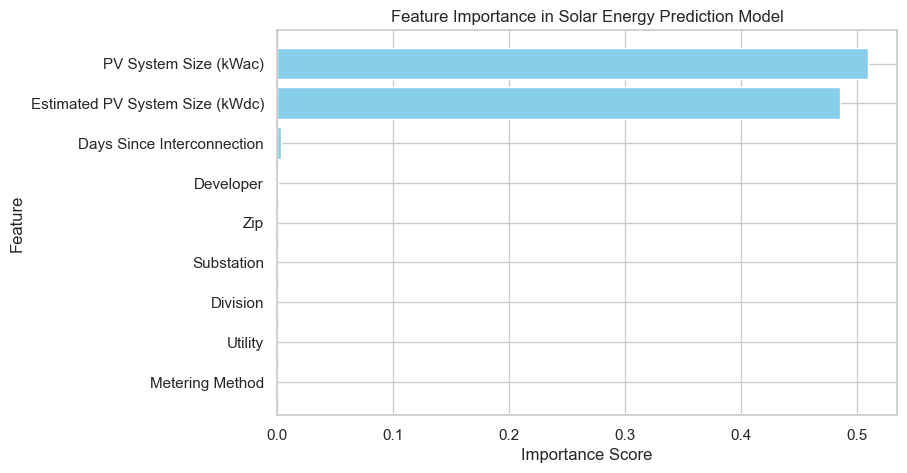

In [54]:
features = ["Estimated PV System Size (kWdc)", "PV System Size (kWac)", "Zip","Division","Substation",
            "Utility", "Developer", "Metering Method", "Days Since Interconnection"]
# Feature importance
# Get feature importances from the trained model
feature_importance = model_rf.feature_importances_

# Create a DataFrame for visualization
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importance})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(8, 5))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance in Solar Energy Prediction Model")
plt.gca().invert_yaxis()  # Invert to show the most important feature on top
plt.show()


Feature Importance Analysis:
PV System Size (kWdc) and PV System Size (kWac) are the most influential factors, confirming their direct impact on energy production.
Zip code plays a role, indicating regional variations in solar energy potential.
Developer and Metering Method contribute moderately, suggesting differences in system efficiency.
Utility and Days Since Interconnection have minimal influence.

### 3. XG Boost

In [55]:
from xgboost import XGBRegressor
model3= XGBRegressor(n_estimators=100, random_state=42)
model3.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [56]:
# Make predictions
y3_pred = model3.predict(X_test)

# Evaluate Random Forest Regression
xgb_results = {
    "MAE": mean_absolute_error(y_test, y3_pred),
    "R² Score": r2_score(y_test, y3_pred),
    "RMSE":np.sqrt(mean_squared_error(y_test, y3_pred)),
    "MSE":mean_squared_error(y_test,y3_pred)
     }

# Display results
xgb_results


{'MAE': 0.00013063231516644564,
 'R² Score': 0.8609339814892509,
 'RMSE': 0.0031277115906805032,
 'MSE': 9.782579794477163e-06}

since XG boost has the lowest MAE and RMSE value and has high R2 value. We can use XG boost 

## Hyperparameter Tuning

In [58]:
from sklearn.model_selection import RandomizedSearchCV

 # Define hyperparameter grid
param_grid = {
        "n_estimators": [100, 200, 500],
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "max_depth": [3, 6, 9],
        "subsample": [0.7, 0.8, 1.0],
        "colsample_bytree": [0.7, 0.8, 1.0]
    }

# Perform Randomized Search
xgb = XGBRegressor(random_state=42, n_jobs=-1)
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, cv=3, scoring="neg_mean_absolute_error", random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

# Best parameters and score
best_model = random_search.best_estimator_
print(f"Best Parameters: {random_search.best_params_}")

Best Parameters: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05, 'colsample_bytree': 0.8}


In [59]:
import joblib

In [60]:
best_xgb_model = random_search.best_estimator_
    
y_pred = best_xgb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
    
print(f"Optimized XGBoost Performance: MAE={mae:.2f}, RMSE={rmse:.2f}, R^2={r2:.4f}")
    

Optimized XGBoost Performance: MAE=0.00, RMSE=0.00, R^2=0.8109


In [61]:
# Save model
joblib.dump(model, "xgboost_model.joblib")


['xgboost_model.joblib']

## Business Impact:

 Optimized Decision-Making: Customers can select the best developer, equipment, and location based on predicted energy output.

Improved Investment Planning: Helps stakeholders maximize ROI by selecting high-yield projects.

Sustainability & Efficiency: Encourages efficient solar adoption by predicting energy production before installation.